In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0    #Normalization
y_train, y_test = to_categorical(y_train), to_categorical(y_test) # one hot encoding

In [4]:
hidden_units = (256, 128, 64)
activation = "relu"

In [5]:
import time

In [6]:
def createTester(model, name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    start = time.time()
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
    end = time.time()
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    
    r_test_loss = round(test_loss, 5)
    r_test_accuracy = round(test_accuracy * 100, 5)
    r_time = round(end - start, 3)
    
    print("\nModel:", name)
    print("test error =", r_test_loss)
    print("Accuracy =", r_test_accuracy, "%")
    print("time =", r_time, "seconds")
    
    return (
        model,
        r_test_loss,
        r_test_accuracy,
        r_time
    )

In [7]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [8]:
Normal_Model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation),
        Dense(hidden_units[1], activation=activation),
        Dense(hidden_units[2], activation=activation),
        Dense(10, activation='softmax')
])

In [9]:
# layers.Dropout
DropoutModel = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation), Dropout(.2),
        Dense(hidden_units[1], activation=activation), Dropout(.2),
        Dense(hidden_units[2], activation=activation), Dropout(.2),
        Dense(10, activation='softmax')
])

In [10]:
from tensorflow.keras.regularizers import l1, l2

In [11]:
# regularizers.l1
Regularizer_L1_Model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation, kernel_regularizer = l1(0.1)),
        Dense(hidden_units[1], activation=activation, kernel_regularizer = l1(0.1)),
        Dense(hidden_units[2], activation=activation, kernel_regularizer = l1(0.1)),
        Dense(10, activation='softmax')
])

In [12]:
# regularizers.l2
Regularizer_L2_Model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation, kernel_regularizer = l2(0.1)),
        Dense(hidden_units[1], activation=activation, kernel_regularizer = l2(0.1)),
        Dense(hidden_units[2], activation=activation, kernel_regularizer = l2(0.1)),
        Dense(10, activation='softmax')
])

In [13]:
# glorot_uniform
Glorot_Uniform_Model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation, kernel_initializer='glorot_uniform'),
        Dense(hidden_units[1], activation=activation, kernel_initializer='glorot_uniform'),
        Dense(hidden_units[2], activation=activation, kernel_initializer='glorot_uniform'),
        Dense(10, activation='softmax')
])

In [14]:
# he_normal
He_Normal_Model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation, kernel_initializer='he_normal'),
        Dense(hidden_units[1], activation=activation, kernel_initializer='he_normal'),
        Dense(hidden_units[2], activation=activation, kernel_initializer='he_normal'),
        Dense(10, activation='softmax')
])

In [15]:
Normal_Model_Result = createTester(Normal_Model, "Normal_Model")

Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 1.8923 - accuracy: 0.3133 - val_loss: 1.7354 - val_accuracy: 0.3793
Epoch 2/5
782/782 [==============================] - 5s 7ms/step - loss: 1.6917 - accuracy: 0.3925 - val_loss: 1.6417 - val_accuracy: 0.4099
Epoch 3/5
782/782 [==============================] - 5s 7ms/step - loss: 1.6064 - accuracy: 0.4234 - val_loss: 1.5635 - val_accuracy: 0.4395
Epoch 4/5
782/782 [==============================] - 5s 7ms/step - loss: 1.5472 - accuracy: 0.4444 - val_loss: 1.6025 - val_accuracy: 0.4269
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.5074 - accuracy: 0.4629

Model: Normal_Model
test error = 1.50742
Accuracy = 46.29 %
time = 28.066 seconds


In [16]:
Regularizer_L1_Result = createTester(Regularizer_L1_Model, "Regularizer_L1_Model")

Epoch 1/5
782/782 [==============================] - 7s 9ms/step - loss: 63.1312 - accuracy: 0.0985 - val_loss: 12.3899 - val_accuracy: 0.1000
Epoch 2/5
782/782 [==============================] - 8s 10ms/step - loss: 12.3916 - accuracy: 0.0972 - val_loss: 12.3930 - val_accuracy: 0.1000
Epoch 3/5
782/782 [==============================] - 7s 9ms/step - loss: 12.3911 - accuracy: 0.1000 - val_loss: 12.4224 - val_accuracy: 0.1000
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 12.3913 - accuracy: 0.0984 - val_loss: 12.3568 - val_accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 12.4143 - accuracy: 0.1000

Model: Regularizer_L1_Model
test error = 12.41427
Accuracy = 10.0 %
time = 37.366 seconds


In [17]:
Regularizer_L2_Result = createTester(Regularizer_L2_Model, "Regularizer_L2_Model")

Epoch 1/5
782/782 [==============================] - 7s 8ms/step - loss: 4.4912 - accuracy: 0.1681 - val_loss: 2.1893 - val_accuracy: 0.1818
Epoch 2/5
782/782 [==============================] - 6s 8ms/step - loss: 2.1914 - accuracy: 0.1817 - val_loss: 2.1761 - val_accuracy: 0.1858
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 2.1728 - accuracy: 0.1843 - val_loss: 2.4628 - val_accuracy: 0.1402
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 2.1658 - accuracy: 0.1848 - val_loss: 2.2749 - val_accuracy: 0.1582
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 2.1877 - accuracy: 0.1687

Model: Regularizer_L2_Model
test error = 2.18765
Accuracy = 16.87 %
time = 33.184 seconds


In [18]:
Glorot_Uniform_Result = createTester(Glorot_Uniform_Model, "Glorot_Uniform_Model")

Epoch 1/5
782/782 [==============================] - 6s 8ms/step - loss: 1.8568 - accuracy: 0.3237 - val_loss: 1.6942 - val_accuracy: 0.3882
Epoch 2/5
782/782 [==============================] - 6s 7ms/step - loss: 1.6778 - accuracy: 0.3979 - val_loss: 1.6468 - val_accuracy: 0.3999
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 1.5986 - accuracy: 0.4295 - val_loss: 1.5963 - val_accuracy: 0.4312
Epoch 4/5
782/782 [==============================] - 6s 7ms/step - loss: 1.5400 - accuracy: 0.4503 - val_loss: 1.5280 - val_accuracy: 0.4529
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.4963 - accuracy: 0.4713

Model: Glorot_Uniform_Model
test error = 1.49631
Accuracy = 47.13 %
time = 30.322 seconds


In [19]:
He_Normal_Result = createTester(He_Normal_Model, "He_Normal_Model")

Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 1.8953 - accuracy: 0.3164 - val_loss: 1.7902 - val_accuracy: 0.3536
Epoch 2/5
782/782 [==============================] - 6s 7ms/step - loss: 1.7059 - accuracy: 0.3883 - val_loss: 1.6987 - val_accuracy: 0.3923
Epoch 3/5
782/782 [==============================] - 6s 7ms/step - loss: 1.6190 - accuracy: 0.4228 - val_loss: 1.5940 - val_accuracy: 0.4311
Epoch 4/5
782/782 [==============================] - 6s 7ms/step - loss: 1.5658 - accuracy: 0.4419 - val_loss: 1.6068 - val_accuracy: 0.4251
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.5968 - accuracy: 0.4257

Model: He_Normal_Model
test error = 1.59684
Accuracy = 42.57 %
time = 29.753 seconds


In [20]:
import matplotlib.pyplot as plt

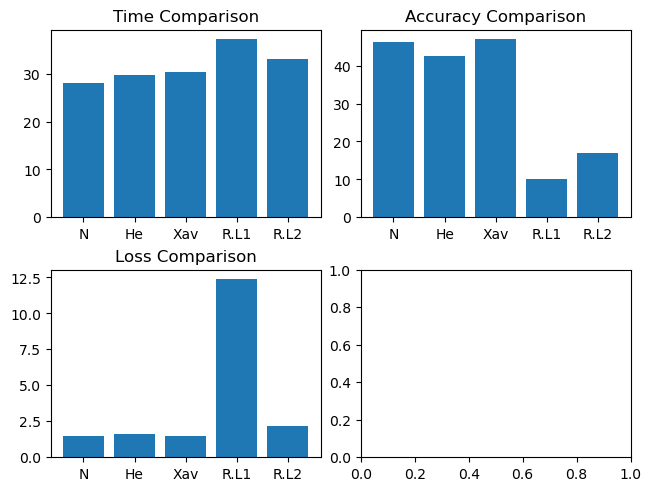

In [22]:
x_name = ["Normal", "He_Normal", "Xavier", "Regularizer_L1", "Regularizer_L2"]
x = ["N", "He", "Xav", "R.L1", "R.L2"]

getY = lambda x: [
    Normal_Model_Result[x], 
    He_Normal_Result[x], 
    Glorot_Uniform_Result[x], 
    Regularizer_L1_Result[x], 
    Regularizer_L2_Result[x]
]

y_time = getY(3)
y_accuracy = getY(2)
y_loss = getY(1)

fig, ax  = plt.subplots(2, 2, layout="constrained")

ax_time = ax[0][0]
ax_acc = ax[0][1]
ax_loss = ax[1][0]

ax_time.bar(x, y_time)
ax_acc.bar(x, y_accuracy)
ax_loss.bar(x, y_loss)

ax_time.title.set_text('Time Comparison')
ax_acc.title.set_text('Accuracy Comparison')
ax_loss.title.set_text('Loss Comparison')

plt.show()